# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.186678e+01     9.383155e+00
 * time: 0.0016548633575439453
     1     2.763206e+01     4.860778e+00
 * time: 0.006888866424560547
     2     1.885185e+01     4.280055e+00
 * time: 0.012089967727661133
     3     1.288344e+01     2.940758e+00
 * time: 0.01645803451538086
     4     1.194721e+01     2.801569e+00
 * time: 0.019794940948486328
     5     1.089841e+01     1.770251e+00
 * time: 0.023251056671142578
     6     1.011533e+01     1.271781e+00
 * time: 0.026489973068237305
     7     9.340925e+00     1.162382e+00
 * time: 0.030128002166748047
     8     8.725210e+00     6.931441e-01
 * time: 0.033540964126586914
     9     8.467250e+00     4.123209e-01
 * time: 0.03746485710144043
    10     8.358130e+00     4.780912e-01
 * time: 0.04129290580749512
    11     8.286957e+00     4.688065e-01
 * time: 0.04557991027832031
    12     8.272010e+00     6.452613e-01
 * time: 0.04852890968322754
    13     8.188374e+00     4.655708e-01

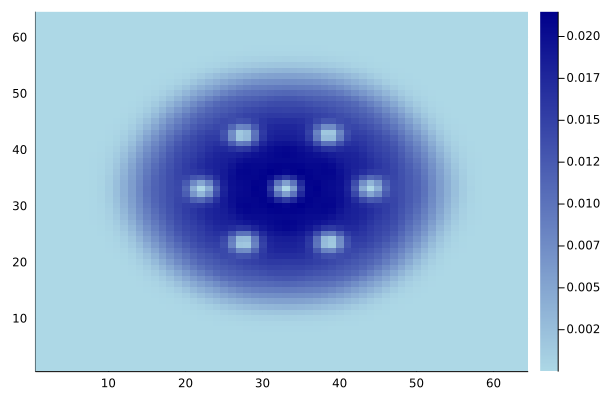

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)